In [268]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor

In [269]:
df = pd.read_csv("D/Classification-5G-4slots.csv")

In [270]:
df =df[(df['algo']=='arbiter') |(df['algo']=='elastic')]

In [271]:
df =df[(df['column']==1) | (df['column']==2) | (df['column']==8)| (df['column']==10)]

In [272]:
#X = df[['rtt_qos', 'tp_qos', 'p_qos']]
#y = df['P1203']

In [273]:
X= df.iloc[:, 4:7].values

In [274]:
y = df.iloc[:,7].values

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [276]:
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [277]:
#tree_regressor.predict([[0.5,2,3]])

In [278]:
#from sklearn import metrics

In [279]:
#predictions = tree_regressor.predict(X_test)

In [280]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [281]:
y_pred = dtr.predict(X_test)


In [282]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_pred)

0.4418167908179575

In [283]:
#plt.scatter(y_test, y_pred)

In [284]:
ap = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


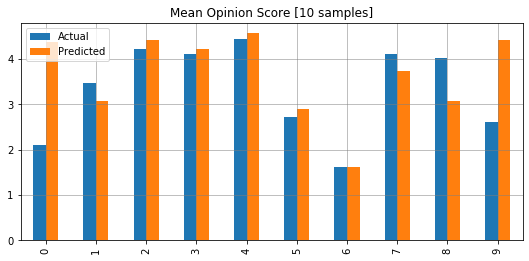

In [285]:
df1 = ap.head(10)
df1.plot(kind='bar',figsize=(9,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
plt.title("Mean Opinion Score [10 samples]")
#plt.savefig('bbatp/25samples.png', dpi = 300)
plt.show()

Text(0, 0.5, 'Predicted Y  (P.1203)')

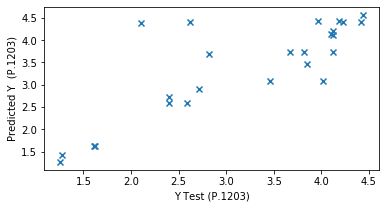

In [286]:
plt.figure(figsize=(6,3))

plt.scatter(y_test,y_pred, marker='x')
#plt.plot(y_test, predictions, color='red', linewidth=1)
plt.xlabel('Y Test (P.1203)')
plt.ylabel('Predicted Y  (P.1203)')

In [287]:
accuracy = dtr.score(X_test,y_test)
print(accuracy*100,'%')

58.80343507308139 %


In [303]:
#PolynomialFeatures

In [304]:
from sklearn.preprocessing import PolynomialFeatures

In [305]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)

In [306]:
# polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [307]:
predictions = poly_reg_model.predict(poly_reg.fit_transform(X_test))

In [308]:
mean_squared_error(y_test, predictions)

0.8892843981330145

In [309]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [310]:
Y_pred = regressor.predict(X_test)

In [311]:
mean_squared_error(y_test, Y_pred)

0.30722770413616507

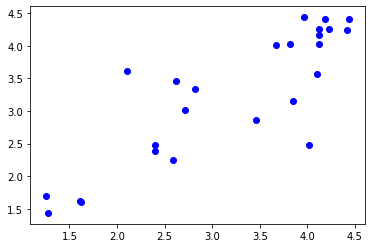

In [314]:

  
# Scatter plot for original data 
plt.scatter(y_test, Y_pred, color = 'blue')   
  
